In [34]:
from pyleri import (
    Choice,
    Grammar,
    Keyword,
    List,
    Optional,
    Regex,
    Repeat,
    Ref,
    Sequence)

import json

In [35]:

class CircuitJSGrammar(Grammar):
    START = Ref()
    
    integer_literal = Regex('[0-9]+')
    decimal_or_integer_literal = Regex('(\d*\.\d+|\d+)')
    exponential_literal = Regex('[+]?(\d*\.\d+|\d+)(e[+-]?\d+)?')
    two_terminal_coords = Repeat(integer_literal, mi=4, ma=4)
       
    capacitor = Sequence(Keyword('c'), two_terminal_coords, integer_literal, exponential_literal, Repeat(decimal_or_integer_literal, mi=2, ma=2))
    ground = Sequence(Keyword('g'), two_terminal_coords, Repeat(integer_literal, mi=2, ma=2))    
    resistor = Sequence(Keyword('r'), two_terminal_coords, integer_literal, integer_literal)
    voltage = Sequence(Keyword('v'), two_terminal_coords, Repeat(integer_literal, mi=3, ma=3), integer_literal, Repeat(integer_literal, mi=2, ma=2), decimal_or_integer_literal)
    wire = Sequence(Keyword('w'), two_terminal_coords, integer_literal)


    START = Choice(capacitor, ground, resistor, voltage, wire)

def node_props(node, children):
    return {
        'start': node.start,
        'end': node.end,
        'name': node.element.name if hasattr(node.element, 'name') else None,
        'element': node.element.__class__.__name__,
        'string': node.string,
        'children': children
    }


# Recursive method to get the children of a node object:
def get_children(children):
    return [node_props(c, get_children(c.children)) for c in children]


# View the parse tree:
def view_parse_tree(res):
    start = res.tree.children[0] \
        if res.tree.children else res.tree
    return node_props(start, get_children(start.children))
        
grammar = CircuitJSGrammar()
print(grammar.parse('r 240 80 448 80 0 10').is_valid)
res = grammar.parse('r 240 80 448 80 0 10')
print(json.dumps(view_parse_tree(res), indent=2))
#print(grammar.parse('v 32 288 32 224 0 0 40 12 0 0 0.5').is_valid)

#res = grammar.parse('c 368 64 368 144 0 1e-7 0.001 0.001')
#print(res.is_valid)
#print(res.pos)


True
{
  "start": 0,
  "end": 20,
  "name": "START",
  "element": "Ref",
  "string": "r 240 80 448 80 0 10",
  "children": [
    {
      "start": 0,
      "end": 20,
      "name": "resistor",
      "element": "Sequence",
      "string": "r 240 80 448 80 0 10",
      "children": [
        {
          "start": 0,
          "end": 1,
          "name": null,
          "element": "Keyword",
          "string": "r",
          "children": []
        },
        {
          "start": 2,
          "end": 15,
          "name": "two_terminal_coords",
          "element": "Repeat",
          "string": "240 80 448 80",
          "children": [
            {
              "start": 2,
              "end": 5,
              "name": "integer_literal",
              "element": "Regex",
              "string": "240",
              "children": []
            },
            {
              "start": 6,
              "end": 8,
              "name": "integer_literal",
              "element": "Regex",
           

In [36]:
class ComponentWarehouse:
    def __init__(self):
        self.classes = {}

    def add_class(self, c):
        self.classes[c.__name__] = c

    # -- the decorator
    def component(self, c):
        self.add_class(c)

        # Decorators have to return the function/class passed (or a modified variant thereof), however I'd rather do this separately than retroactively change add_class, so.
        # "held" is more succint, anyway.
        return c 

    def __getitem__(self, n):
        return self.classes[n]

component_warehouse = ComponentWarehouse()

#@food_types.held
#class chocolate:
#    taste = "sweet"

#@food_types.held
#class lemon:
#    taste = "sour"

#print(food_types['chocolate'].taste) # No manual add_class needed! :D


In [37]:
@component_warehouse.component
class capacitor:
    pass

@component_warehouse.component
class ground:
    pass

@component_warehouse.component
class resistor:
    pass

@component_warehouse.component
class voltage:
    pass

@component_warehouse.component
class wire:
    pass






In [47]:
with open('tests/basic.txt') as f:
    f.readline()
    for line in f:
        print(line)
        parsing_result = grammar.parse(line)
        print(parsing_result.is_valid)
        if parsing_result.is_valid:
            FIRST_CHILD = 0
            start = parsing_result.tree.children[FIRST_CHILD].children[FIRST_CHILD]
            component_parameters = start.children[FIRST_CHILD]
            component_name = start.element.name
            print(component_name)
            print(component_warehouse[component_name])
            
            

v 160 144 160 64 0 0 40 10 0 0 0.5

True
voltage
<class '__main__.voltage'>
r 160 64 368 64 0 100000

True
resistor
<class '__main__.resistor'>
c 368 64 368 144 0 1e-7 0.001 0.001

True
capacitor
<class '__main__.capacitor'>
w 368 144 160 144 0

True
wire
<class '__main__.wire'>
g 160 144 160 176 0 0
True
ground
<class '__main__.ground'>


In [39]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

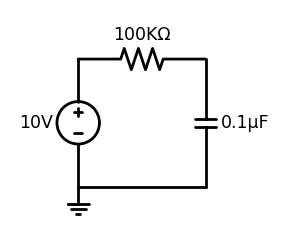

In [40]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    d += elm.SourceV().label('10V')
    d += elm.Resistor().right().label('100KΩ')
    d += elm.Capacitor().down().label('0.1μF', loc='bottom')
    d += elm.Line().left()
    d += elm.Ground()
    


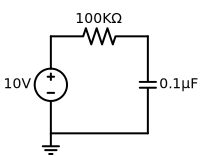

In [41]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing(show=True, backend='svg') as d:
    d += elm.SourceV().label('10V')
    d += elm.Resistor().right().label('100KΩ')
    d += elm.Capacitor().down().label('0.1μF', loc='bottom')
    d += elm.Line().left()
    d += elm.Ground()

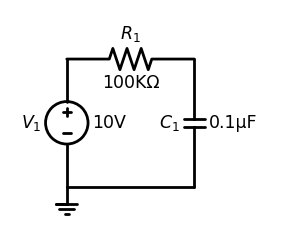

In [42]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    d += elm.SourceV().label('10V', loc='bottom').label('$V_1$', loc='top')
    d += elm.Resistor().right().label('100KΩ', loc='bottom').label('$R_1$', loc='top')
    d += elm.Capacitor().down().label('0.1μF', loc='bottom').label('$C_1$', loc='top')
    d += elm.Line().left()
    d += elm.Ground()